In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
#read data & ubah convert ke datetime
df = pd.read_csv("SBAnational.csv", parse_dates=['ApprovalDate', 'DisbursementDate'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  int64         
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  int64         
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  int64         
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  object        
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  float64       
 13  CreateJob          899164 non-null  int64   

terdapat 27 jumlah column dan 899164 jumlah baris

# 1. (A).Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
# Terdapat banyak column yang harus diubah type datanya antara lain:
- DisbursementGross (int)
- BalanceGross (int)
- ChgOffPrinGr (int)
- GrAppv (int)
- SBA_Appv (int)
- NAICS (object)
- ApprovalFY (int)
- ApprovalDate (datetime)
- DisbursementDate (datetime)

In [13]:
pd.set_option('display.max_columns',100)
df.sample(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
510979,4944364004,NORAMCO,CONROE,TX,77304,BANCO POPULAR NORTH AMERICA,NY,421830,2001-09-26,2001,222,15,1.0,0,15,1,1,0,N,NaN,2001-10-31,"$1,300,000.00",$0.00,P I F,$0.00,"$1,300,000.00","$975,000.00"
441760,4289924009,CHEVRON FOOD MART,ACWORTH,GA,30101,UNITED COMMERCIAL BANK,GA,445120,2001-02-09,2001,120,3,2.0,3,3,1,1,0,N,NaN,2001-05-31,"$141,200.00",$0.00,P I F,$0.00,"$141,300.00","$120,020.00"
374417,3624183009,K&R CLASSIC CLEANERS,SYRACUSE,NY,13209,FIRST NIAGARA BANK NATL ASSOC,NY,812320,1989-11-30,1990,94,4,2.0,0,0,1,0,N,N,NaN,1990-04-30,"$140,000.00",$0.00,P I F,$0.00,"$140,000.00","$126,000.00"
728241,7577223002,AMERICAN ELECTRONIC ENTERTAINM,ATLANTA,GA,30318,WELLS FARGO BANK NATL ASSOC,SD,0,1994-09-14,1994,77,5,1.0,0,0,1,0,N,N,NaN,1994-10-31,"$249,844.00",$0.00,P I F,$0.00,"$250,000.00","$187,500.00"
733875,7632543008,STOYLES PRINTING COMPANY,MASON CITY,IA,50401,IOWA BUSINESS GROWTH COMPANY,IA,323116,1994-09-29,1994,240,56,1.0,21,32,1,0,N,N,NaN,1995-10-11,"$448,000.00",$0.00,P I F,$0.00,"$448,000.00","$448,000.00"


# Isi kolom yang tidak sesuai 

### Kolom "ApprovalFY"

In [14]:
#Ubah ApprovalFY ke Interger
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

disini terdapat kesalahan terdapat data type string (1976A, ' '), jadi harus dihilangkan huruf (A) & tanda(' ') untuk menjadi type data int. selain itu kolom 'ApprovalFY' dan 'ApprovalDate' (tahunnya tidak sama). ket. dilakukan nanti pada saat "Preprocessing"

### Kolom ("DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv")

In [15]:
df[["DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"]]

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...
899159,"$70,000.00",$0.00,$0.00,"$70,000.00","$56,000.00"
899160,"$85,000.00",$0.00,$0.00,"$85,000.00","$42,500.00"
899161,"$300,000.00",$0.00,$0.00,"$300,000.00","$225,000.00"
899162,"$75,000.00",$0.00,"$46,383.00","$75,000.00","$60,000.00"


disini bentuk values dari column tersebut masih berbentuk "object" karena terdapat tanda ($ & ,)

In [16]:
def remove_sign(item):
        new = item.replace('$','')
        new2 = new.replace(' ','')
        new3 = new2.replace(',','')
        return float(new3)

df['DisbursementGross'] = df['DisbursementGross'].apply(lambda x : remove_sign(x))
df['BalanceGross'] = df['BalanceGross'].apply(lambda x : remove_sign(x))
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].apply(lambda x : remove_sign(x))
df['GrAppv'] = df['GrAppv'].apply(lambda x : remove_sign(x))
df['SBA_Appv'] = df['SBA_Appv'].apply(lambda x : remove_sign(x))

### Kolom NAICS

In [17]:
df['NAICS'].value_counts()

0         201948
722110     27989
722211     19448
811111     14585
621210     14048
           ...  
927110         1
327410         1
314992         1
922110         1
325192         1
Name: NAICS, Length: 1312, dtype: int64

terdapat values yang kurang sesuai yaitu nilai "0" dan kemungkinan pada saat preprocessing kami hanya akan mengambil values 2 digit dari depan, jadi hanya berdasarkan sector industrynnya

### Kolom "NexExist"

In [18]:
df['NewExist'].value_counts().reset_index()

,index,NewExist
0,1.0,644869
1,2.0,253125
2,0.0,1034


terdapat nilai yang kurang sesuai/tidak terdefinisi yaitu "0" 

### Kolom "UrbanRural"

In [19]:
df['UrbanRural'].value_counts().reset_index()

,index,UrbanRural
0,1,470654
1,0,323167
2,2,105343


terdapat nilai yang kurang sesuai/tidak terdefinisi yaitu "0" 

### Kolom "LowDoc"

In [20]:
df['LowDoc'].value_counts().reset_index()

,index,LowDoc
0,N,782822
1,Y,110335
2,0,1491
3,C,758
4,S,603
5,A,497
6,R,75
7,1,1


terdapat nilai selain "N" & "Y"

### Kolom "NoEmp" 

In [21]:
df["NoEmp"].max()

9999

Disini kolom "NoEmp" menyatakan jumlah karyawan, berdasarkan sumber terkait harusnya yang termasuk "Small Business" memiliki jumlah max karyawan antara 250 - 1500. tetapi dikolom tersebut ada data yang melebihi nilai 1500. "References : https://www.sba.gov/sites/default/files/files/Size_Standards_Table.pdf and https://www.sba7a.loans/sba-7a-loans-small-business-blog/small-business-definition

### Kolom "Term"

In [22]:
df["Term"].min()

0

Kolom "Term" menyatakan jumlah jangka waktu pembayaran, tetapi dikolom "Term" terdapat values "0" yang tidak memungkinkan.

### Kolom "FranchiseCode"

In [14]:
df["FranchiseCode"].unique()

array([    1,     0, 15100, ...,  2899, 18701, 15930], dtype=int64)

Dari informasi tabel kita tahu bahwa FranchiseCode, (00000 atau 00001) = no FranchiseCode. Jadi kami nantinya pada saat preprocessing memutuskan untuk memisahkan Franchise menjadi:
- FranchiseCode = 1 (memiliki FranchiseCode)
- FranchiseCode = 0 (tanpa FranchiseCode) 

jadi hanya terdapat 2 values 

# B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?


In [15]:
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

disini kolom yang terdapat nilai kosong antara lain :
- name
- City
- State
- Bank
- BankState
- NewExist
- RevLineCr
- LowDoc
- ChgOffDate
- DisbursementDate 
- MIS_Status

# Statistic Descriptive

### C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 


In [16]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,1,0,N,Y,NaN,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,1,0,N,Y,NaN,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.0,0,0,1,0,N,N,NaN,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,1,0,N,Y,NaN,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,1,0,N,N,NaN,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0


In [24]:
# pengelompokan kolom berdasarkan jenisnya

cats = ['Name', 'City', 'Bank', 'BankState', 'State', 'RevLineCr', 'LowDoc', 'MIS_Status']
nums = ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
timestamp = ['ApprovalDate', 'ChgOffDate', 'DisbursementDate', 'ApprovalFY']

In [24]:
df[nums].describe()

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,FranchiseCode
count,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,8.991640e+05,899164.000000,8.991640e+05,8.991640e+05,8.991640e+05,899164.000000
mean,110.773078,11.411353,1.280404,8.430376,10.797257,0.757748,2.011540e+05,2.989349,1.350330e+04,1.926870e+05,1.494888e+05,2753.725933
std,78.857305,74.108196,0.451750,236.688165,237.120600,0.646436,2.876408e+05,1442.161912,6.515229e+04,2.832634e+05,2.284146e+05,12758.019136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.000000e+02,1.000000e+02,0.000000
25%,60.000000,2.000000,1.000000,0.000000,0.000000,0.000000,4.200000e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04,1.000000
50%,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.125000e+04,1.000000
75%,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,2.380000e+05,0.000000,0.000000e+00,2.250000e+05,1.750000e+05,1.000000
max,569.000000,9999.000000,2.000000,8800.000000,9500.000000,2.000000,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06,99999.000000


pada kolom "Term", "NoEmp", "NewExist" & "UrbanRural" harusnya tidak terdapat nilai "0"

In [21]:
df[cats].describe()

,Name,City,Bank,BankState,State,RevLineCr,LowDoc,MIS_Status
count,899150,899134,897605,897598,899150,894636,896582,897167
unique,779583,32581,5802,56,51,18,8,2
top,SUBWAY,LOS ANGELES,BANK OF AMERICA NATL ASSOC,CA,CA,N,N,P I F
freq,1269,11558,86853,118116,130619,420288,782822,739609


pada kolom "RevLineCr" & "LowDoc" seharusnya hanya terdapat 2 nilai unique "Y" & "N"

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  int64         
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  int64         
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  int64         
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  object        
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  float64       
 13  CreateJob          899164 non-null  int64   

In [22]:
#Cek Value unique Setiap Column category
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Name:
SUBWAY                            1269
QUIZNO'S SUBS                      433
COLD STONE CREAMERY                366
QUIZNO'S                           345
DOMINO'S PIZZA                     329
                                  ... 
Mohammad N. Hassan (epc) for C       1
N.J. Yellow Tale Flower              1
CEF INC.                             1
SCANNELL AND ASSOCIATES LP           1
PACIFIC TRADEWINDS FAN & LIGHT       1
Name: Name, Length: 779583, dtype: int64

Value count kolom City:
LOS ANGELES                       11558
HOUSTON                           10247
NEW YORK                           7846
CHICAGO                            6036
MIAMI                              5594
                                  ...  
EL DORADO SPRINGS (ELDORADO SP        1
HUNTINDON                             1
LEBAHON                               1
WILLOW RIVER                          1
SO. OZONE PARK                        1
Name: City, Length: 32581, dtype: int64



# 2. Univariate Analysis.

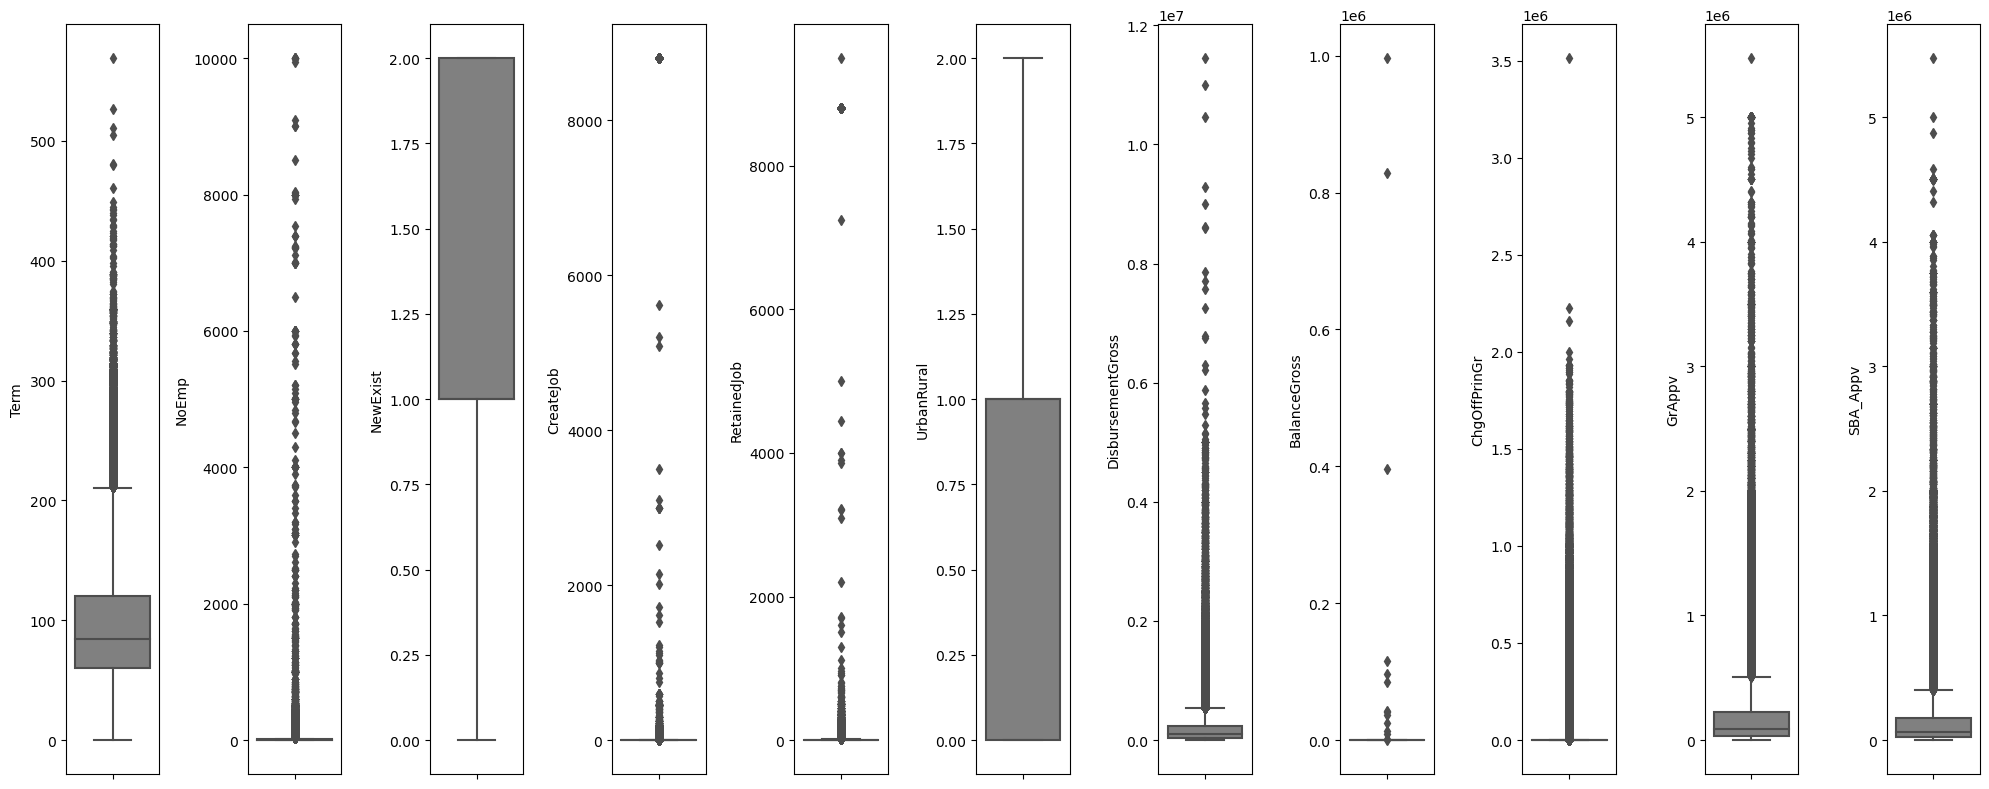

In [23]:
plt.figure(figsize=(20, 8))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

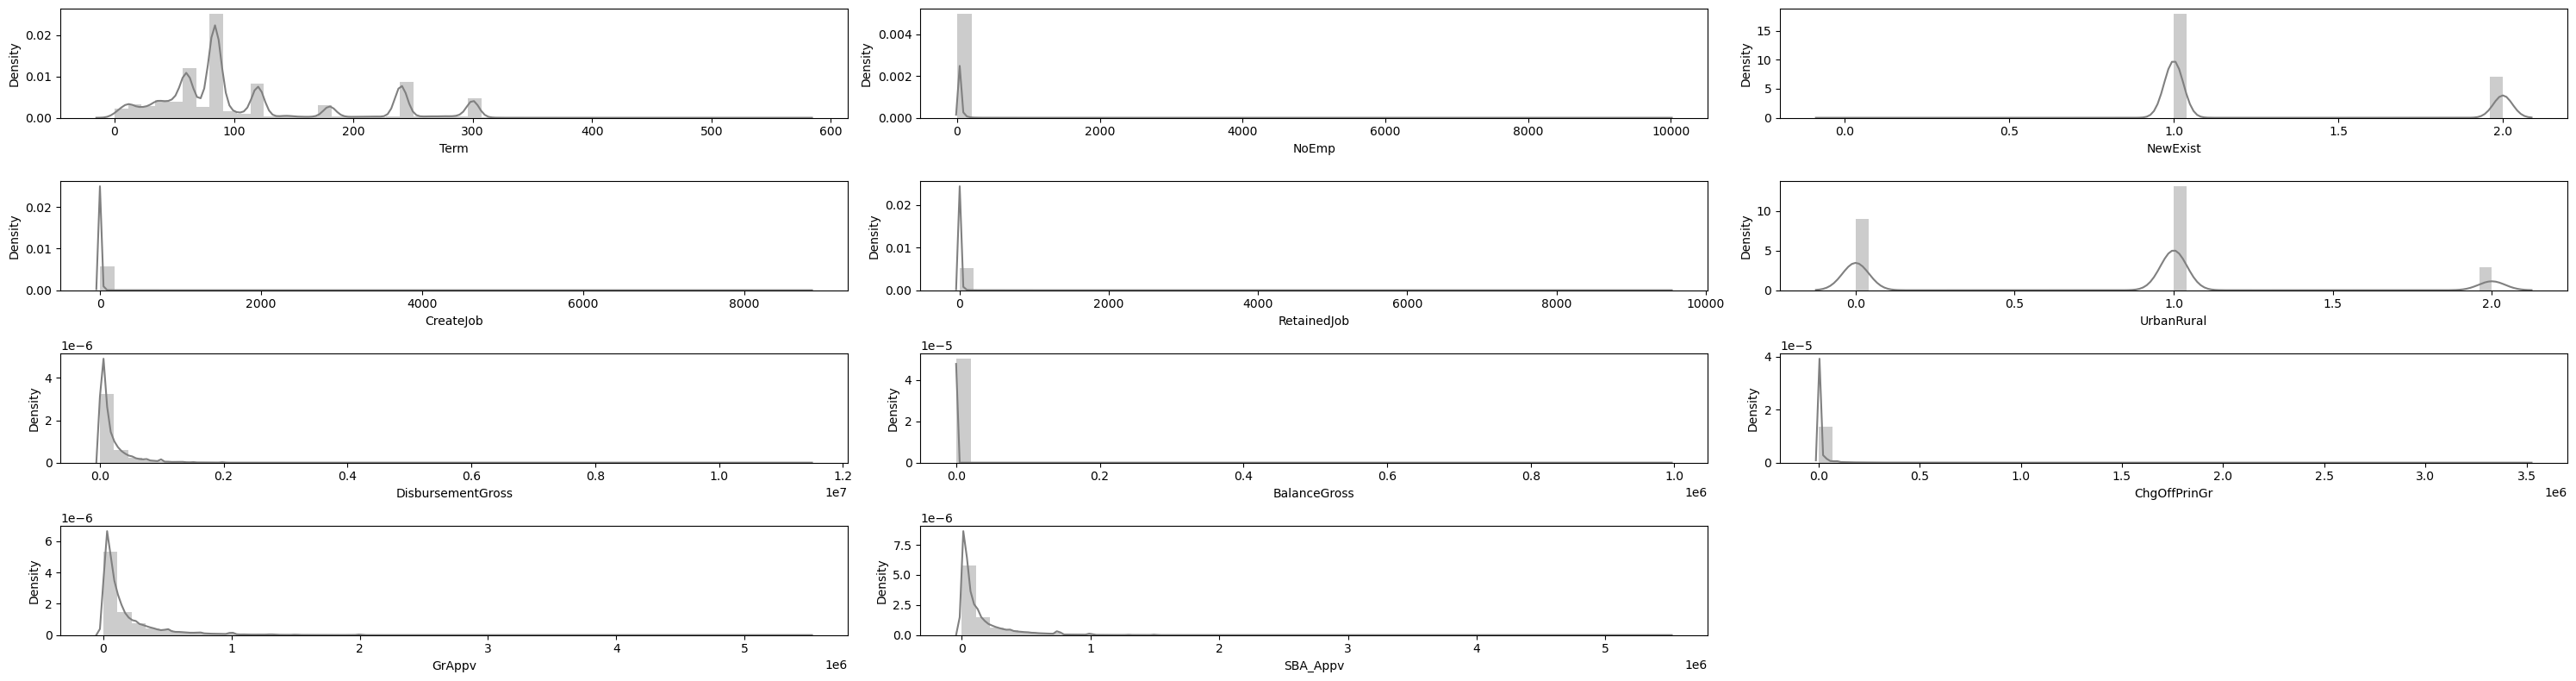

In [25]:
plt.figure(figsize=(30, 8))
for i in range(0, len(nums)):
    plt.subplot(4, 3, i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

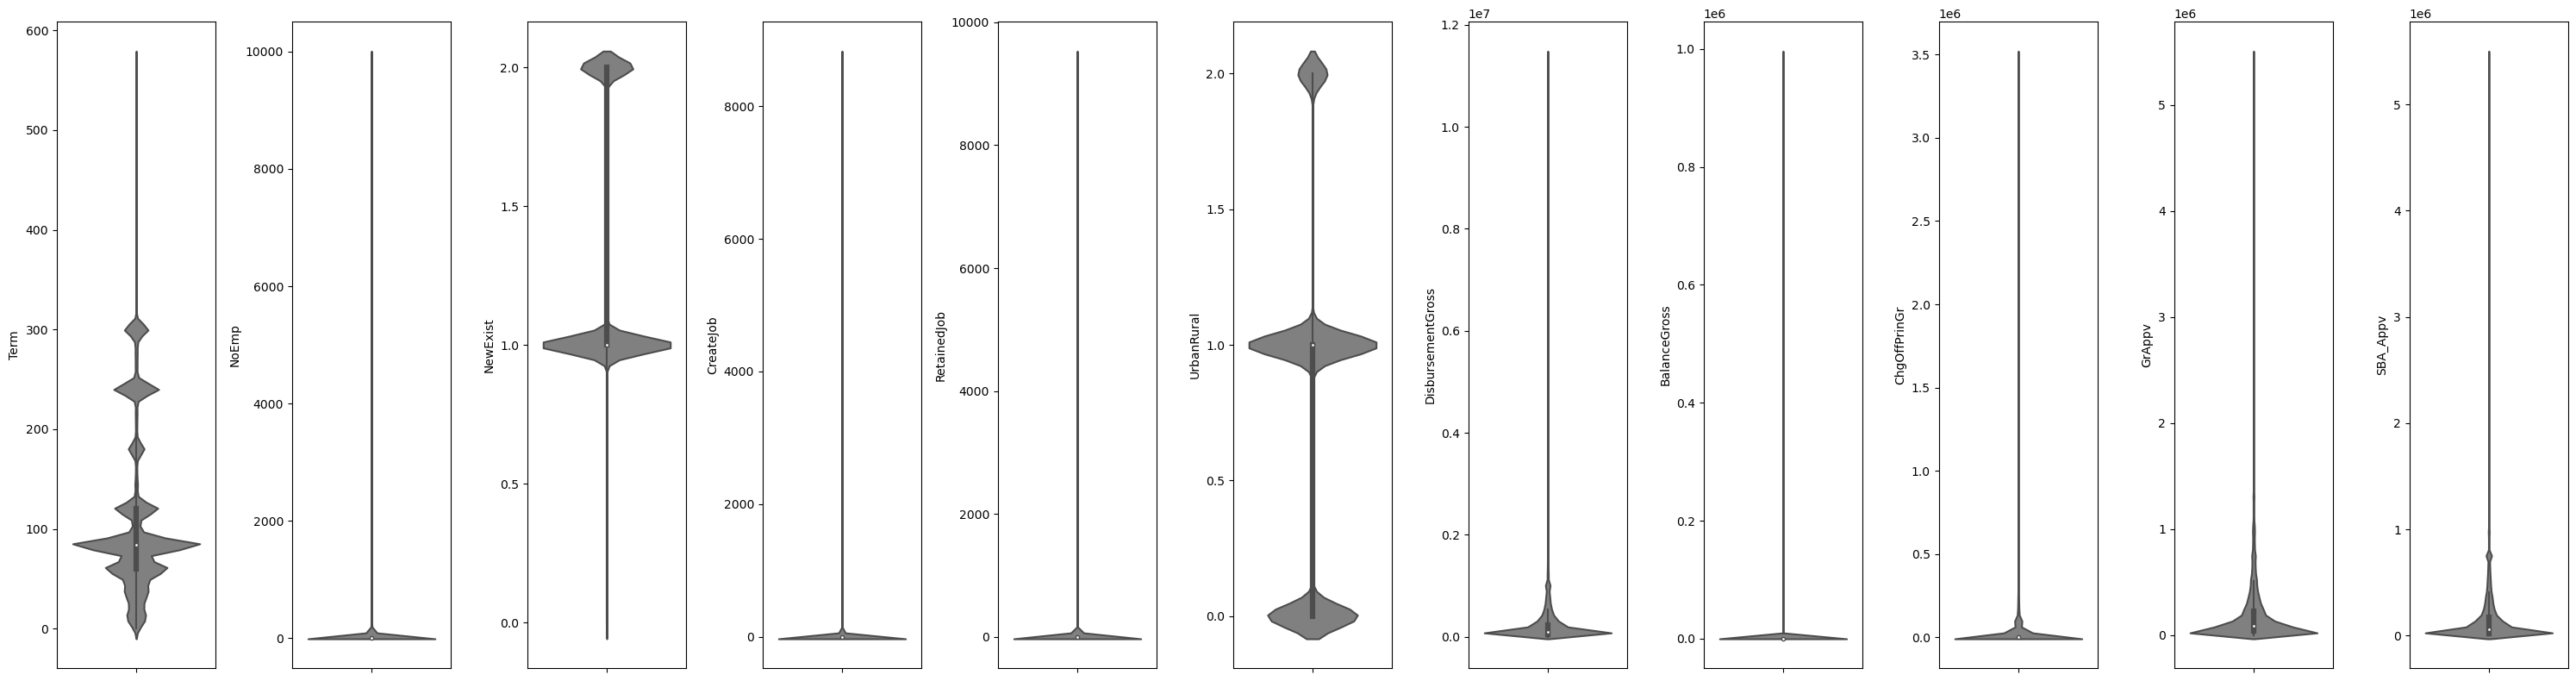

In [25]:
plt.figure(figsize=(30, 8))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

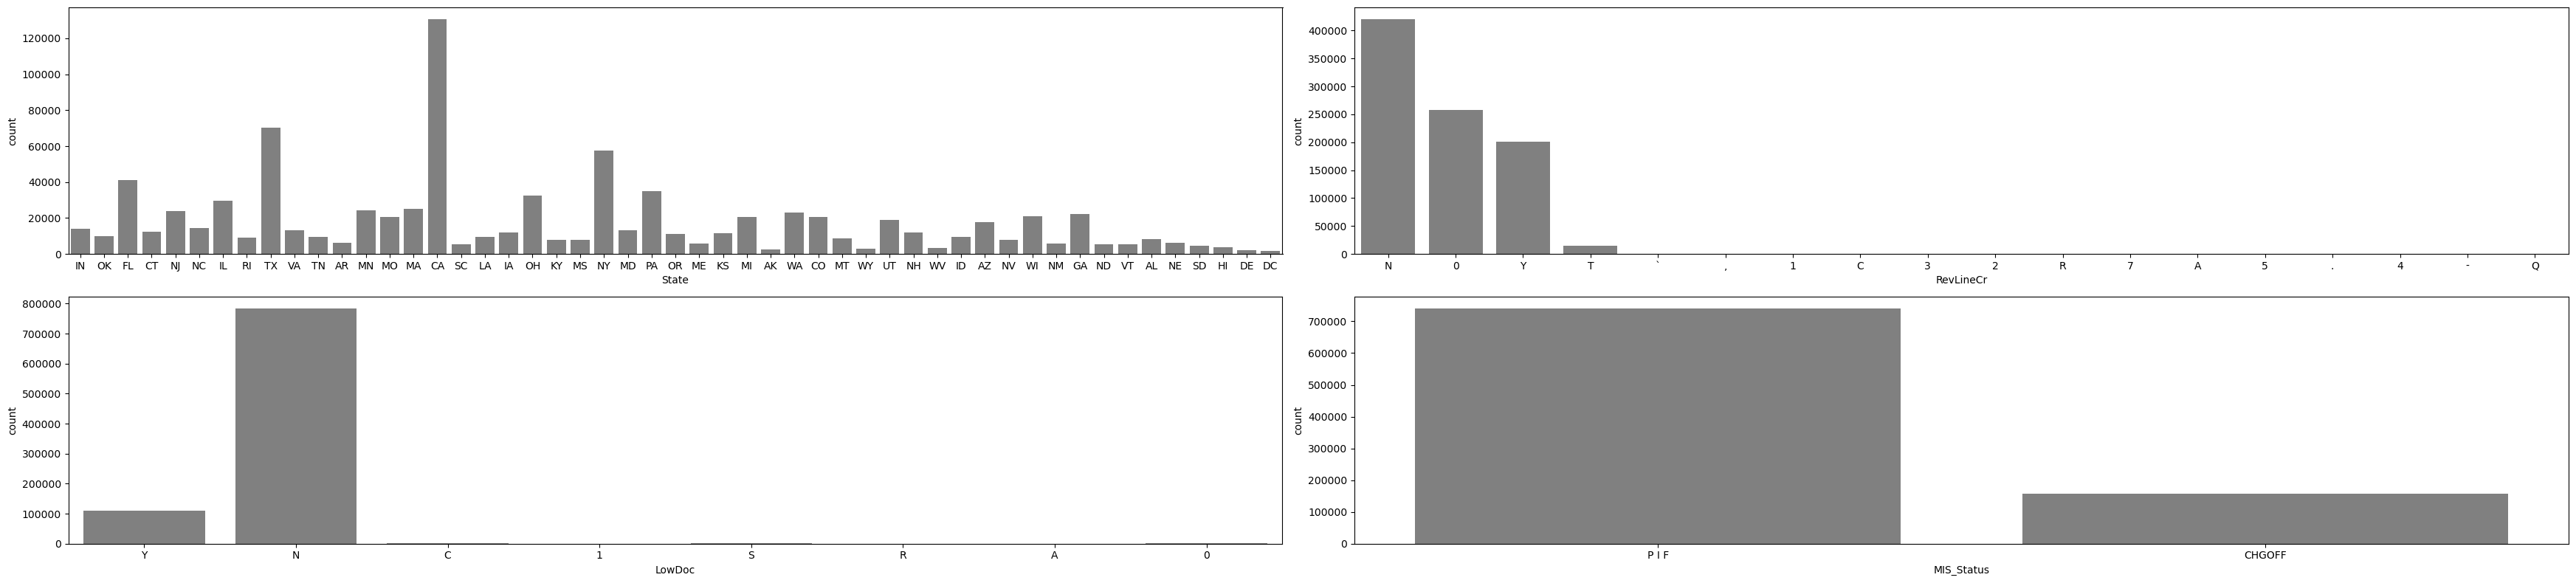

In [26]:
plt.figure(figsize=(35, 8))
for i in range(0, len(cats[4:])):
    plt.subplot(2, 2, i+1)
    sns.countplot(df[cats[4:][i]], color='gray', orient='h')
    plt.tight_layout()

# 3. Multivariate Analysis

In [27]:
df.corr()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
LoanNr_ChkDgt,1.000000,0.027956,-0.060822,0.099793,0.009032,-0.040024,-0.022095,-0.023463,0.046296,-0.148337,0.057165,0.000585,-0.058625,0.068952,0.077252
Zip,0.027956,1.000000,-0.034026,0.146074,0.014157,-0.038853,0.003632,0.003674,0.011398,-0.072798,0.092365,-0.000265,0.010097,0.099452,0.105817
NAICS,-0.060822,-0.034026,1.000000,-0.111024,-0.038237,0.047053,-0.039376,-0.036587,0.027800,0.436724,-0.047576,-0.000072,0.029633,-0.056521,-0.063106
Term,0.099793,0.146074,-0.111024,1.000000,0.046140,-0.073100,0.027581,0.024931,0.028940,-0.204080,0.466391,0.001701,-0.047319,0.502610,0.524912
NoEmp,0.009032,0.014157,-0.038237,0.046140,1.000000,-0.040222,0.008626,0.015350,0.006376,-0.041824,0.088651,-0.000122,0.007800,0.090430,0.092566
NewExist,-0.040024,-0.038853,0.047053,-0.073100,-0.040222,1.000000,-0.002130,-0.009128,0.124152,0.031701,-0.074405,0.001355,0.018502,-0.066506,-0.063976
CreateJob,-0.022095,0.003632,-0.039376,0.027581,0.008626,-0.002130,1.000000,0.993953,0.001038,-0.029924,0.006955,-0.000057,0.009378,0.008182,0.013749
RetainedJob,-0.023463,0.003674,-0.036587,0.024931,0.015350,-0.009128,0.993953,1.000000,-0.000515,-0.024851,0.010274,-0.000080,0.010632,0.010693,0.014891
FranchiseCode,0.046296,0.011398,0.027800,0.028940,0.006376,0.124152,0.001038,-0.000515,1.000000,-0.003776,0.059574,-0.000201,0.025386,0.067896,0.069442
UrbanRural,-0.148337,-0.072798,0.436724,-0.204080,-0.041824,0.031701,-0.029924,-0.024851,-0.003776,1.000000,-0.035031,0.002278,0.057184,-0.058882,-0.070754


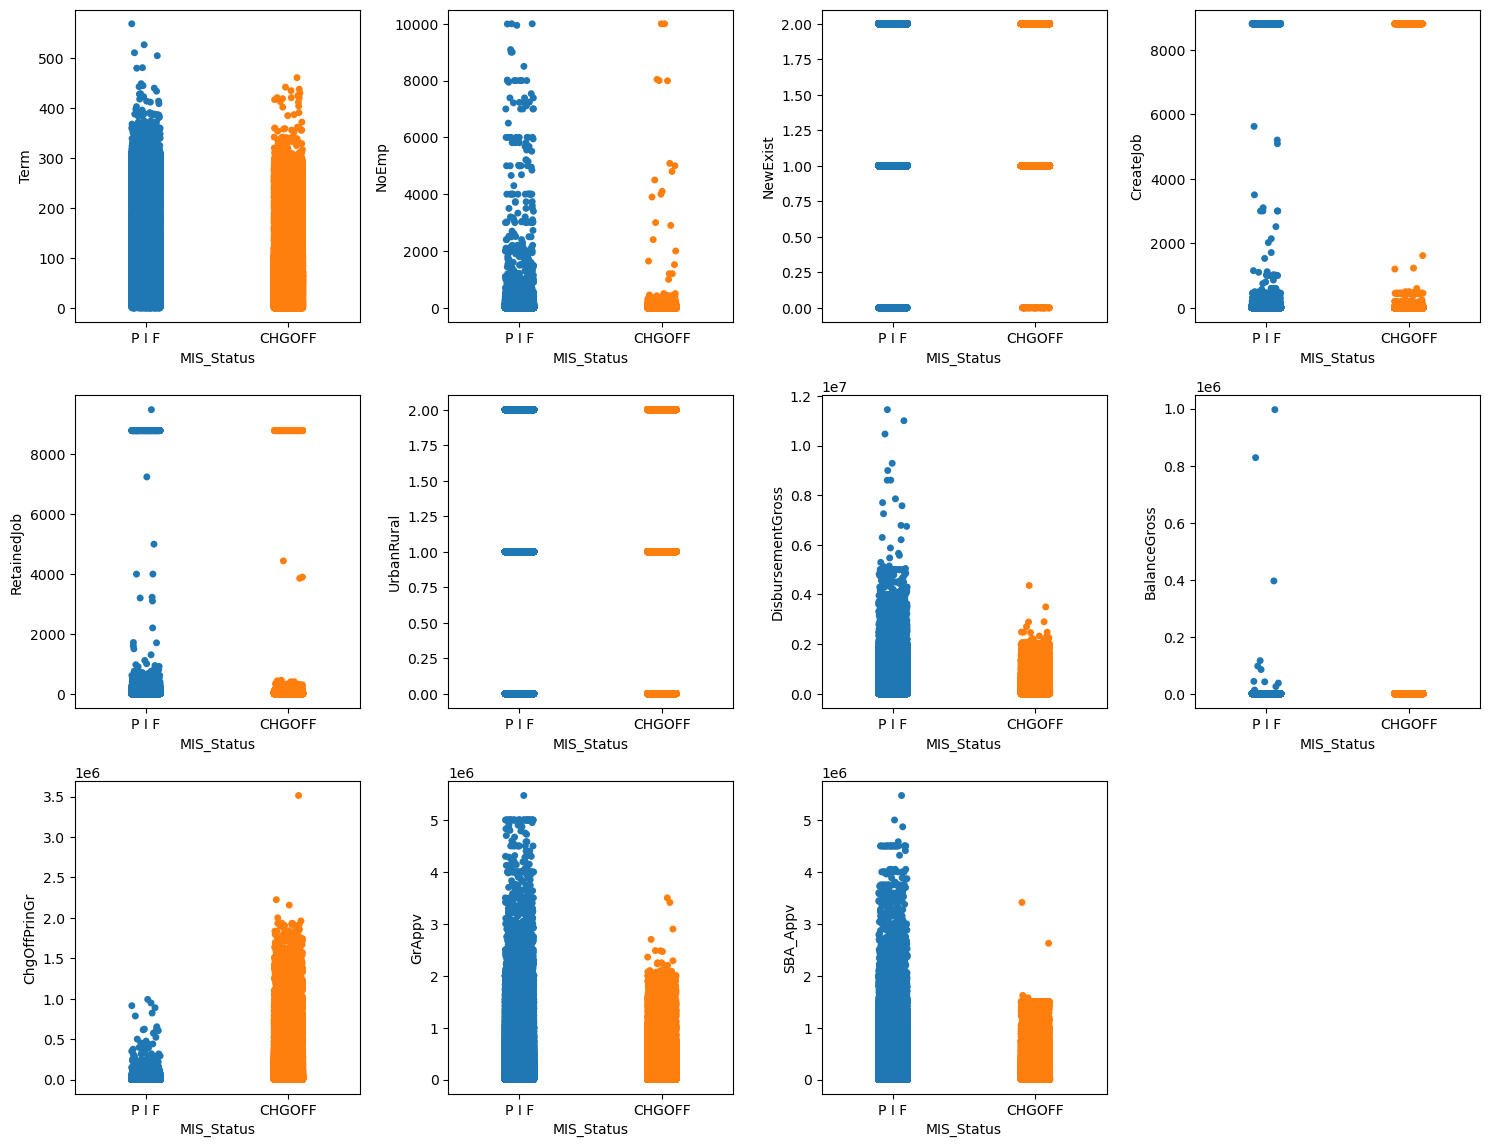

In [39]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='MIS_Status', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

In [27]:
# ubah values target menjadi numeric agar bisa dilihat korelasinya
df['MIS_Status'] = np.where(df['MIS_Status'] == 'P I F', 1, 0)

<AxesSubplot:>

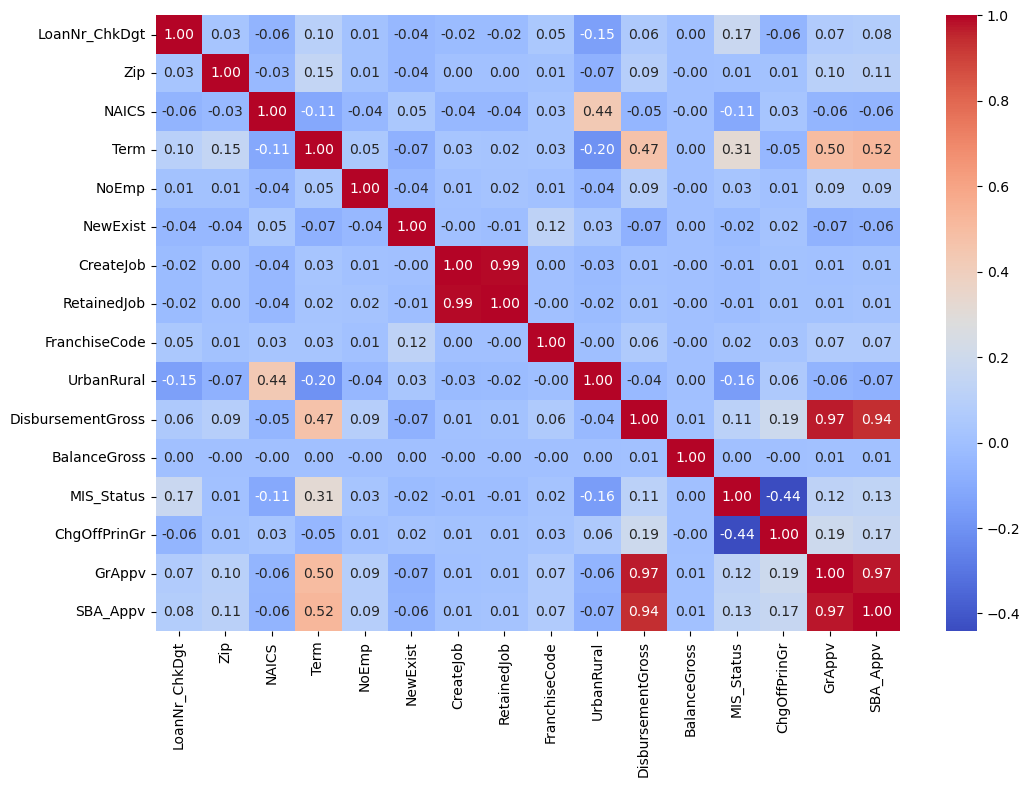

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')

Disini terdapat low korelasi terhadap feature target ("MIS_Status") dengan kolom "Term"

# Kak sukma tolong jalanin code dibawah ya hehe

In [ ]:
sns.pairplot(df[[
'Term',
'NoEmp',
'NewExist',
'UrbanRural',
'LowDoc',
'DisbursementGross',
'GrAppv',
'SBA_Appv',
'MIS_Status',]],hue='MIS_Status',diag_kind='hist')

# pada saat data preprocessing nanti kemungkinan kami menambahkan feature baru, yaitu antara lain:
- terdapat masa resesi terjadi pada bulan dec 2007 - jun 2009, sehingga membuat variabel baru "Recession". resesi = 1, other = 0
- Kepemilikan properti (tanah), Hal ini dikarenakan nilai dari properti tersebut seringkali cukup besar untuk menutupi jumlah pokok yang masih belum dibayar, sehingga mengurangi kemungkinan terjadinya gagal bayar. pinjaman yang didukung oleh properti biasanya memiliki durasi 25 tahun atau lebih (300 bulan) dan merupakan satu-satunya pinjaman yang diberikan untuk jangka waktu yang begitu lama, sedangkan pinjaman yang tidak didukung  oleh properti biasanya memiliki durasi kurang dari 25 tahun (<300 bulan).  Oleh karena itu, membuat variabel dummy "RealEstate," di mana "RealEstate" = 1 jika "Term" (≥ 300 bulan) dan "RealEstate" = 0 jika "Term" < 300 bulan.
- terdapat asumsi semakin besar jumlah yang dijamin semakin kecil resiko gagal bayar. membuat kolom "portion" untuk melihat rasio persentase antara, jumlah yang diberikan oleh bank (GrAPP) dan jumlah yang dijamin oleh SBA (SBA_Appv). (SBA_Appv/GrAPP)